In [1]:
!ls /data/20210430_WZ_allhad_pT_450_1200_nevents_1M

hepmc  merged_selected_0.h5  merged_selected_2.h5  merged_selected_4.h5  root
logs   merged_selected_1.h5  merged_selected_3.h5  process_cards


In [2]:
qcdDir = '/data/20210430_QCDjj_pT_450_1200_nevents_1M/'
wzDir = '/data/20210430_WZ_allhad_pT_450_1200_nevents_1M/'
nchunks = 6

windows = [55, 65, 75, 85, 95, 105]

In [3]:
import numpy as np
import h5py
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
def fill_array(to_fill, obj, dtype):
    arr = np.array(obj, dtype=dtype)
    to_fill[:len(arr)] = arr

In [6]:
dtype = 'float32'

In [7]:
qcd_lo_obs = np.empty((nchunks, 190000, 11))
qcd_nlo_obs = np.empty((nchunks, 190000, 11))
for i in range(nchunks):
    with h5py.File(f'{qcdDir}/merged_selected_{i}.h5', 'r') as readfile:
        fill_array(qcd_lo_obs[i], readfile["objects/jets/jet1_obs"][:], dtype)
        fill_array(qcd_nlo_obs[i], readfile["objects/jets/jet2_obs"][:], dtype)


In [8]:
low_level_names = ['pt', 'eta', 'phi', 'mass', 'tau1', 'tau2', 'tau3', 'd12', 'd23', 'ECF2', 'ECF3']
qcd_lo_obs = np.vstack(qcd_lo_obs)
mx = qcd_lo_obs[:, 0] != 0
qcd_df = pd.DataFrame(np.hstack((qcd_lo_obs[mx], np.vstack(qcd_nlo_obs)[mx])),
                          columns=low_level_names + ['nlo_' + nm for nm in low_level_names])


In [9]:
wz_lo_obs = np.empty((5, 190000, 11))
wz_nlo_obs = np.empty((5, 190000, 11))
for i in range(5):
    with h5py.File(f'{wzDir}merged_selected_{i}.h5', 'r') as readfile:
        fill_array(wz_lo_obs[i], readfile["objects/jets/jet1_obs"][:], dtype)
        fill_array(wz_nlo_obs[i], readfile["objects/jets/jet2_obs"][:], dtype)


In [10]:
low_level_names = ['pt', 'eta', 'phi', 'mass', 'tau1', 'tau2', 'tau3', 'd12', 'd23', 'ECF2', 'ECF3']
wz_lo_obs = np.vstack(wz_lo_obs)
mx = wz_lo_obs[:, 0] != 0
wz_df = pd.DataFrame(np.hstack((wz_lo_obs[mx], np.vstack(wz_nlo_obs)[mx])),
                          columns=low_level_names + ['nlo_' + nm for nm in low_level_names])


In [53]:
qcd_mass = qcd_df['mass'].values
wz_mass = wz_df['mass'].values

In [54]:
sig_wz_mass = wz_mass[np.where(np.logical_and(wz_mass>windows[2], wz_mass<windows[3]))]

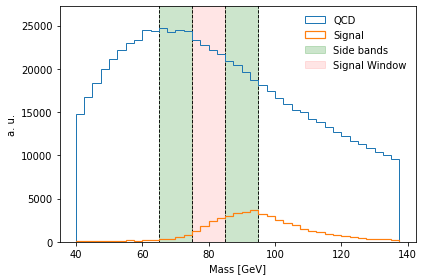

In [149]:
numsig = 20000

fig, ax = plt.subplots()


bgcount, bins, _ = ax.hist(qcd_mass, bins = np.arange(40, 140, 2.5), histtype = 'step', label='QCD')
ax.hist(np.random.choice(wz_mass, 50000), bins=bins, histtype='step', label = 'Signal', lw=1.2)

ymin1, ymax1 = ax.get_ylim()
ax.axvspan(windows[1], windows[2], ymin=a, ymax=b, alpha=0.2, color='green', label='Side bands')
ax.axvspan(windows[2], windows[3], ymin=ymin1, ymax=ymax1, alpha=0.1, color='red', label='Signal Window')
ax.axvspan(windows[3], windows[4], ymin=ymin1, ymax=ymax1, alpha=0.2, color='green')
ax.vlines([windows[1], windows[2], windows[3], windows[4]], ymin=ymin1, ymax=ymax1, ls='dashed', lw=0.9, color='black', transform=ax.get_xaxis_transform())
ax.set_xlabel('Mass [GeV]')
ax.set_ylabel('a. u.')

plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('fullRangeSignal.png', dpi=400)
plt.show()


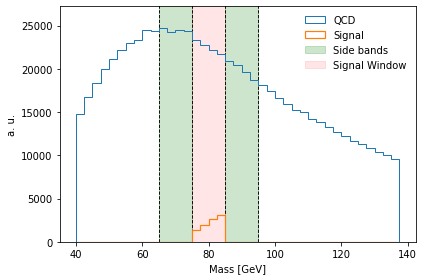

In [150]:
numsig = 20000

fig, ax = plt.subplots()


bgcount, bins, _ = ax.hist(qcd_mass, bins = np.arange(40, 140, 2.5), histtype = 'step', label='QCD')
ax.hist(np.random.choice(sig_wz_mass, 9000), bins=bins, histtype='step', label = 'Signal', lw=1.2)

ymin, ymax = ax.get_ylim()
ax.axvspan(windows[1], windows[2], ymin=ymin, ymax=ymax, alpha=0.2, color='green', label='Side bands')
ax.axvspan(windows[2], windows[3], ymin=ymin, ymax=ymax, alpha=0.1, color='red', label='Signal Window')
ax.axvspan(windows[3], windows[4], ymin=ymin, ymax=ymax, alpha=0.2, color='green')
ax.vlines([windows[1], windows[2], windows[3], windows[4]], ymin=ymin, ymax=ymax, ls='dashed', lw=0.9, color='black', transform=ax.get_xaxis_transform())
ax.set_xlabel('Mass [GeV]')
ax.set_ylabel('a. u.')

plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('sigRangeSignal.png', dpi=400)
plt.show()
